<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

# feel free to import other libraries! 

In [3]:
df = pd.read_csv('states_edu.csv')

Chosen test: **Reading for 4thgrade**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [108]:
df = pd.read_csv('states_edu.csv')
rmlist=['GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_8_SCORE']
#item to remove, didnt know what these were and didnt want other test scores in there as it could be data leakage
df.drop(rmlist,axis=1,inplace=True) #removes the columns above
df.dropna(inplace=True) #drops NAN values
#we dont have all #s so I am going to drop state too
df.set_index('PRIMARY_KEY',inplace=True) #sets the index to the year-state combo item, just for refrence
df['scores']=1 
df.loc[df.AVG_READING_4_SCORE < 220, 'scores'] = 0
#these two lines create the column "score" which I was using as a classifier, the first line makes the new column with all values to 1 (or in my case was better than the nationa average 4th grade reading score)
#the second line says if the reading score is less than 220 to assign it to class 0 or was worse than national average
df

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,AVG_READING_4_SCORE,scores
PRIMARY_KEY,,,,,,,,,,,,,,
1994_ALABAMA,ALABAMA,1994,730004.0,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,826442.0,306977.0,231508.0,208.0,0
1994_ARIZONA,ARIZONA,1994,708482.0,3566586.0,348847.0,1478372.0,1739367.0,3803379.0,1652311.0,1054136.0,183778.0,696618.0,206.0,0
1994_ARKANSAS,ARKANSAS,1994,312695.0,1393287.0,132108.0,810396.0,450783.0,1445984.0,816270.0,403608.0,75434.0,105349.0,209.0,0
1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,6754346.0,1615630.0,1916061.0,197.0,0
1994_COLORADO,COLORADO,1994,549570.0,3061865.0,165539.0,1269532.0,1626794.0,3113755.0,1574164.0,977343.0,95796.0,328219.0,213.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,5075509.0,627473.0,1086722.0,229.0,1
2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,4510672.0,546926.0,1601069.0,226.0,1
2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,1161944.0,233836.0,232738.0,216.0,0


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [ ]:
'I kinda did this above lol with dropping non existance features and such, will come back to this if there is significant data leakage (no data leakage we good)'

Final feature list: YEAR	ENROLL	TOTAL_REVENUE	FEDERAL_REVENUE	STATE_REVENUE	LOCAL_REVENUE	TOTAL_EXPENDITURE	INSTRUCTION_EXPENDITURE	SUPPORT_SERVICES_EXPENDITURE	OTHER_EXPENDITURE	CAPITAL_OUTLAY_EXPENDITURE 

Feature selection justification: I picked these features because I knew what they were. Also becuase within these features there is probably not a large possibility of data leakage, and the more data the better.

<h2> EDA </h2>

Visualization 1

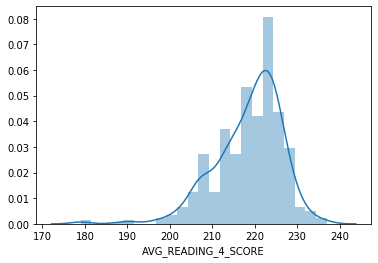

In [111]:
sns.distplot(df['AVG_READING_4_SCORE']) #plot distribution of scores

We want to look at a distribution of our result data aka what we are modeling. This is important because i chose to train a classifier on if the score was >220 (I looked it up and that was the mean score in 2019). Visualizing this allows us to see a picture of what we are actually analyzing. Also looks like there is an outlier at 180 and it is roughly normal shaped

Visualization 2

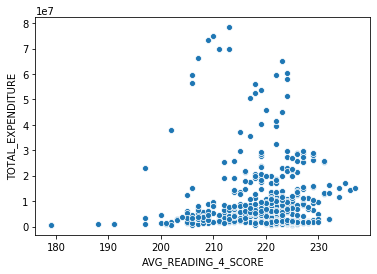

In [113]:
sns.scatterplot(data=df,y='TOTAL_EXPENDITURE',x='AVG_READING_4_SCORE')

I felt that there might be a strong correlation between total spending by the schools and reading score, however this doesnt really seem to be the case. If i was doing a more professional assignment I would probably look at each score range vs expenditure instead of a scatterplot.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [36]:
from sklearn.model_selection import train_test_split

In [121]:
X = df.drop(['STATE','scores','AVG_READING_4_SCORE'],axis=1) #dropped the non numeric columns for X
y = df['scores'] #assigned the labels to y

X_train, X_test, y_train, y_test = train_test_split(
X, y, random_state=0) #split the data ahah

scaler = MinMaxScaler() #scaled the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
# I did grid search here but that took so long to run so I just didnt do that for the model but look I can do gridsearch lol
'''from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators': [100,50,60,70,150,200], 
               'max_features':['auto', 'sqrt'],
               'max_depth':[0,1,2,3,4,None],
                'min_samples_split':[2, 5, 10],
               'min_samples_leaf' : [1, 2, 4]}
model=GridSearchCV(GradientBoostingClassifier(), param_grid=grid_values, n_jobs = -1,scoring = 'roc_auc')'''

In [91]:
model=GradientBoostingClassifier(max_features= 'auto', min_samples_leaf= 1, n_estimators= 200) #created model object
model.fit(X_train, y_train) #fit model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

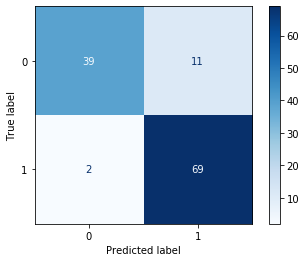

In [120]:
# for classification:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)
#y_pred = model.predict(X_test)
#roc_auc_score(y_test,y_pred)
#model.score(X_test, y_test) #saw accuracy and ROC the latter is what it was tuned on


In [89]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


'''col_name = ??
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel(??)'''

'col_name = ??\ncol_index = X_train.columns.get_loc(col_name)\n\nf = plt.figure(figsize=(12,6))\nplt.scatter(X_train[col_name], y_train, color = "red")\nplt.scatter(X_train[col_name], model.predict(X_train), color = "green")\nplt.scatter(X_test[col_name], model.predict(X_test), color = "blue")\n\nnew_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)\nintercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]\nplt.plot(new_x, intercept+new_x*model.coef_[col_index])\n\nplt.legend([\'controlled model\',\'true training\',\'predicted training\',\'predicted testing\'])\nplt.xlabel(col_name)\nplt.ylabel(??)'

<h2> Summary </h2>

I wanted to predict if a school would be above or below the national average for the 4th grade reading assessment. My model works with high ROC (roughly 73) and 90% accuracy. These numbers arent the best and probably hint to overfitting, however this is just an intro assignment so I dont want to spend hours enumerating my model lol. I dont think 90% is too bad considering it was trained on ROC evaluation, if i had optimized for accuracy instead  I probably could have done better, but i think the ML community needs to work on changing the evaluation metrics somewhat. I think also when I did gridsearch the accuracy was much higher but I didnt wanna put that in here because it takes a lot of time. Student preformances can be predicted pretty well (also I dont really know why i optimized for ROC i just like it lol). If i was doing this for a client I would also make sure to visualize a tree for them to look at (also yes I probably shouldve tried naive-bayes or some other model too this was just a tutorial lol). There is at least one variable that appears to predict 4th grade reading scores pretty well considering my accuracy was 90% while not even optimizing for it.